In [10]:
import torch
from torch import nn


net = nn.Sequential(
    # 第一层卷积：输入1通道（灰度图），输出96个通道
    # 使用 11x11 大卷积核，步长为4，padding=1（为了稍微保持中心对齐）
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
    nn.ReLU(),

    # 第一层池化：3x3 最大池化，步长为2，减小空间维度
    nn.MaxPool2d(kernel_size=3, stride=2),

    # 第二层卷积：输入96通道，输出256通道，卷积核大小5x5，padding=2 保持特征图大小
    nn.Conv2d(96, 256, kernel_size=5, padding=2),
    nn.ReLU(),

    # 第二层池化：再次减小空间尺寸
    nn.MaxPool2d(kernel_size=3, stride=2),

    # 第三层卷积：使用较小的 3x3 卷积核，输出通道384
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),

    # 第四层卷积：继续使用 3x3 卷积核，不改变特征图尺寸
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),

    # 第五层卷积：减少输出通道数为384
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    # nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),

    # 第三次池化：继续减小空间尺寸
    nn.MaxPool2d(kernel_size=3, stride=2),

    # 将卷积输出展平，准备送入全连接层
    nn.Flatten(),

    # 第一层全连接：输入维度根据输入图像大小决定（此处假设为6400）
    # 输出4096个神经元 + ReLU 激活 + Dropout（防止过拟合）
    nn.Linear(9600, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),

    # 第二层全连接：保持4096维，继续学习深层特征
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),

    # 最后一层全连接：输出10类（比如在 FashionMNIST 或 CIFAR-10 上分类）
    nn.Linear(4096, 10)
)


In [11]:
X = torch.rand(size=(3, 1, 224, 224), dtype=torch.float32)  # 模拟一个 batch size 为 1 的 28x28 灰度图像
for layer in net:
    X = layer(X)  # 逐层将 X 传入网络
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([3, 96, 54, 54])
ReLU output shape:	 torch.Size([3, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([3, 96, 26, 26])
Conv2d output shape:	 torch.Size([3, 256, 26, 26])
ReLU output shape:	 torch.Size([3, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([3, 256, 12, 12])
Conv2d output shape:	 torch.Size([3, 384, 12, 12])
ReLU output shape:	 torch.Size([3, 384, 12, 12])
Conv2d output shape:	 torch.Size([3, 384, 12, 12])
ReLU output shape:	 torch.Size([3, 384, 12, 12])
Conv2d output shape:	 torch.Size([3, 384, 12, 12])
ReLU output shape:	 torch.Size([3, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([3, 384, 5, 5])
Flatten output shape:	 torch.Size([3, 9600])
Linear output shape:	 torch.Size([3, 4096])
ReLU output shape:	 torch.Size([3, 4096])
Dropout output shape:	 torch.Size([3, 4096])
Linear output shape:	 torch.Size([3, 4096])
ReLU output shape:	 torch.Size([3, 4096])
Dropout output shape:	 torch.Size([3, 4096])
Linear output shape:	 torch.Size([3,

In [12]:
from ml_model_utils import *
batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(
    batch_size=batch_size,
    resize=224
)

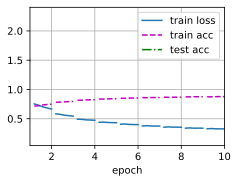

In [18]:
lr = 0.01
num_epochs = 10
train_ch6(net, train_iter, test_iter,  num_epochs,lr, try_gpu())